In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import KBinsDiscretizer

import pickle

In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_num = df.select_dtypes(include=['float64', 'int64'])

df_num = df_num.dropna()

df_num.shape

(1121, 38)

In [4]:
X = df_num.drop("SalePrice", axis=1)
y = df_num["SalePrice"]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

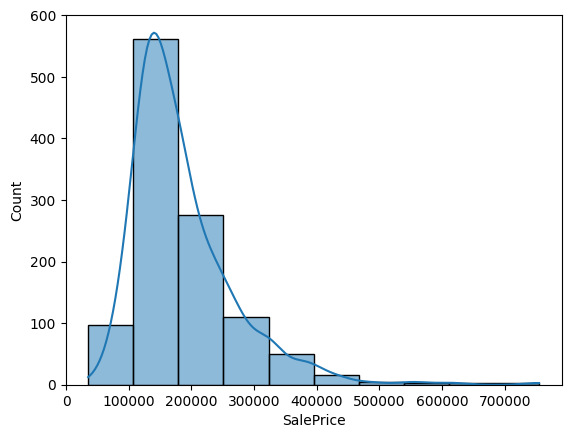

In [5]:
import seaborn as sns

sns.histplot(y, bins=10, kde=True)

In [6]:
binning = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
y_binned = binning.fit_transform(y.values.reshape(-1,1)).reshape(-1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y_binned
)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


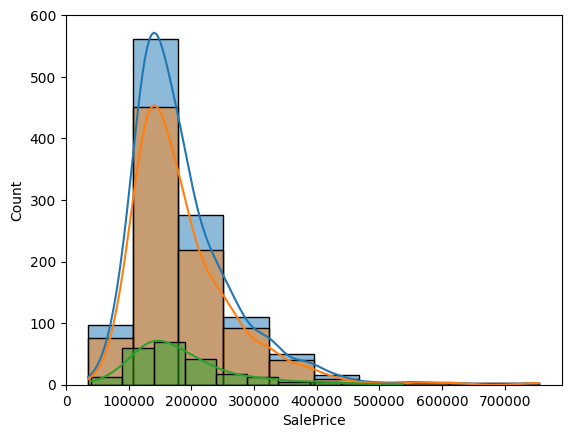

In [8]:
sns.histplot(y, bins=10, kde=True)
sns.histplot(y_train, bins=10, kde=True)
sns.histplot(y_test, bins=10, kde=True)
plt.show()

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
def evaluate(model, X, y, title=""):
    y_pred = model.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    mse = mean_squared_error(y, y_pred, squared=True)
    r2 = r2_score(y, y_pred)
    print(f"---- {title} ----")
    print(f"RMSE : {rmse:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"R²   : {r2:.4f}")

In [11]:
evaluate(model, X_train, y_train, "Train")

---- Train ----
RMSE : 38078.74
MSE : 1449990192.74
R²   : 0.7918


In [12]:
evaluate(model, X_test, y_test, "Test")

---- Test ----
RMSE : 28381.14
MSE : 805488963.54
R²   : 0.8773


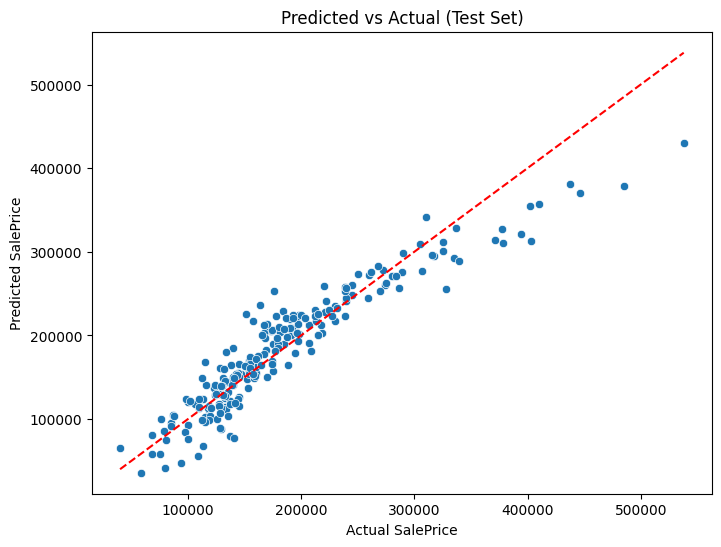

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_test = model.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # perfect prediction line
plt.show()

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Error)")
plt.show()

NameError: name 'residuals' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Modèle sauvegardé dans model.pkl")